El analisis exploratorio se debe iniciar comprendiendo nuestro objetivo, en este caso es comprender el comportamiento de las telecomunicaciones principalmente el internet dentro de Argentina, para ello es necesario conocer la infraestructura con la que cuenta cada zona de relevancia al proyecto, su poblacion y los ingresos que se generan en esa zona

Para empezar el analisis es necesario conocer la informacion, para ello es necesario importar la informacion provista en el dataset de Intenet, entender su estructira, informacion y a partir de ello seleccionar las columnas necesarias.

In [119]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

internet=pd.read_excel("Datasets/Internet.xlsx", sheet_name=None) #Datasets

Una vez cargada la informacion de dataset "Internet" es neceesario conocer su estructura.

In [120]:
print(type(internet))

<class 'dict'>


La variable internet contiene un diccionario, este se debe a que se cargaron todas las hojas dentro del excel, para hacer esto la informacion se almaceno en un diccionario, para manipular la informacion se requiere crear un dataframe que contenga cada tabla/hoja del dataset original para ello es necesario conocer las claves (nombres de las hojas) del documento original

In [121]:
print(internet.keys()) 

dict_keys(['Acc_vel_loc_sinrangos', 'Velocidad_sin_Rangos', 'Accesos_tecnologia_localidad', 'Velocidad % por prov', 'Totales VMD', 'Totales Accesos Por Tecnología', 'Accesos Por Tecnología', 'Penetración-poblacion', 'Penetracion-hogares', 'Penetracion-totales', 'Totales Accesos por rango', 'Accesos por rangos', 'Dial-BAf', 'Totales Dial-BAf', 'Ingresos '])


Una ves obtenidas es necesario crear los dataframe necesarios 

In [122]:
Ingresos=pd.DataFrame(internet['Ingresos '])

In [123]:
Ingresos.head(10)

,Año,Trimestre,Ingresos (miles de pesos),Periodo
0,2024,2,4.420322e+08,Abr-Jun 2024
1,2024,1,3.461990e+08,Ene-Mar 2024
2,2023,4,1.673760e+08,Oct-Dic 2023
3,2023,3,1.331066e+08,Jul-Sept 2023
4,2023,2,1.180603e+08,Jun-Mar 2023
5,2033,1,1.041350e+08,Ene-Mar 2023
6,2022,4,7.244348e+07,Oct-Dic 2022
7,2022,3,6.408678e+07,Jul-Sept 2022
8,2022,2,6.041950e+07,Abr-Jun 2022
9,2022,1,5.521931e+07,Ene-Mar 2022


In [125]:
Acc_vel_loc_sinrangos=pd.DataFrame(internet['Acc_vel_loc_sinrangos'])
Velocidad_sin_Rangos=pd.DataFrame(internet['Velocidad_sin_Rangos'])
Accesos_tecnologia_localidad=pd.DataFrame(internet['Accesos_tecnologia_localidad'])
Velocidad_por_prov=pd.DataFrame(internet['Velocidad % por prov'])
Totales_VMD=pd.DataFrame(internet['Totales VMD'])
Totales_Accesos_Por_Tecnología=pd.DataFrame(internet['Totales Accesos Por Tecnología'])
Accesos_Por_Tecnología=pd.DataFrame(internet['Accesos Por Tecnología'])
Penetración_poblacion=pd.DataFrame(internet['Penetración-poblacion'])
Penetracion_hogares=pd.DataFrame(internet['Penetracion-hogares'])
Penetracion_totales=pd.DataFrame(internet['Penetracion-totales'])
Totales_Accesos_por_rango=pd.DataFrame(internet['Totales Accesos por rango'])
Accesos_por_rangos=pd.DataFrame(internet['Accesos por rangos'])
Dial_BAf=pd.DataFrame(internet['Dial-BAf'])
Totales_Dial_BAf=pd.DataFrame(internet['Totales Dial-BAf'])
Ingresos=pd.DataFrame(internet['Ingresos '])

#### -----------------   TIPOS DE DATOS  -----------------------

#### Es necesario verificar los tipos de datos con los que se trabajara para no tener algun inconveniente posteriormente.

In [126]:
Accesos_tecnologia_localidad.dtypes

Provincia      object
Partido        object
Localidad      object
Tecnologia     object
Link Indec     object
Accesos       float64
dtype: object

In [127]:
Velocidad_por_prov.dtypes

Año                         int64
Trimestre                   int64
Provincia                  object
Mbps (Media de bajada)    float64
dtype: object

In [9]:
Totales_VMD.dtypes

Año                         int64
Trimestre                   int64
Mbps (Media de bajada)    float64
Trimestre.1                object
dtype: object

In [10]:
Accesos_Por_Tecnología.dtypes

Año              object
Trimestre        object
Provincia        object
ADSL            float64
Cablemodem      float64
Fibra óptica    float64
Wireless        float64
Otros           float64
Total           float64
dtype: object

Se observa que dentro de la tabla accesor por tecnologia los datos de año y trimestre tiene la propiedad de objeto, este tipo de dato se cambiara dentro del entorno de power bi para poder hacer uso de la informacion sin problemas

In [11]:
Penetracion_totales.dtypes

Año                               int64
Trimestre                         int64
Accesos por cada 100 hogares    float64
Accesos por cada 100 hab        float64
Periodo                          object
dtype: object

### ------------- TIPO DE INFORMACION CONTENIDA ----------------

A partir de ahora es necesario conocer la informacion almacenada en cada uno de los dataframes y poder determinar su composicion

In [128]:
Accesos_tecnologia_localidad.head()

,Provincia,Partido,Localidad,Tecnologia,Link Indec,Accesos
0,BUENOS AIRES,25 de Mayo,25 de Mayo,ADSL,6854100,755.0
1,BUENOS AIRES,25 de Mayo,25 de Mayo,CABLEMODEM,6854100,4600.0
2,BUENOS AIRES,25 de Mayo,25 de Mayo,FIBRA OPTICA,6854100,2.0
3,BUENOS AIRES,25 de Mayo,25 de Mayo,SATELITAL,6854100,742.0
4,BUENOS AIRES,25 de Mayo,25 de Mayo,WIRELESS,6854100,727.0


La tabla accesos tecnologia localidad da un panorama de los tipos de tecnologias usada en las diversas localidades, asi como la cantidad de accesos del mismo

In [13]:
Acc_vel_loc_sinrangos.head()

,Partido,Localidad,link Indec,Velocidad (Mbps),Provincia,Accesos
0,BUENOS AIRES,25 de Mayo,25 de Mayo,6854100,0.00,1.0
1,BUENOS AIRES,25 de Mayo,25 de Mayo,6854100,0.50,2.0
2,BUENOS AIRES,25 de Mayo,25 de Mayo,6854100,0.75,19.0
3,BUENOS AIRES,25 de Mayo,25 de Mayo,6854100,3.00,85.0
4,BUENOS AIRES,25 de Mayo,25 de Mayo,6854100,3.50,145.0


Se puede observar que en la tabla de "Acc_vel_loc_sinrangos" existe una discrepancia en el nombre de las colunmnas respecto a otra tabla, por lo cual es necesario cambiar los nombres de forma correcta

In [14]:
n_nombres={'Partido':'Provincia','Localidad':'Partido','link Indec':'Localidad','Velocidad (Mbps)':'Link indec','Provincia':'Velocidad (Mbps)','Accesos':'Accesos'}

Creamos un diccionario con los nuevos nombres y los reemplazamos en la tabla correspondiente

In [15]:
Acc_vel_loc_sinrangos.rename(columns=n_nombres,inplace=True)

In [16]:
Acc_vel_loc_sinrangos.head()

,Provincia,Partido,Localidad,Link indec,Velocidad (Mbps),Accesos
0,BUENOS AIRES,25 de Mayo,25 de Mayo,6854100,0.00,1.0
1,BUENOS AIRES,25 de Mayo,25 de Mayo,6854100,0.50,2.0
2,BUENOS AIRES,25 de Mayo,25 de Mayo,6854100,0.75,19.0
3,BUENOS AIRES,25 de Mayo,25 de Mayo,6854100,3.00,85.0
4,BUENOS AIRES,25 de Mayo,25 de Mayo,6854100,3.50,145.0


Se siguen analizando los demas dataframes para conocer su informacion

In [17]:
Velocidad_sin_Rangos.head()

,Año,Trimestre,Provincia,Velocidad,Accesos
0,2024,2,BUENOS AIRES,75.0,1062
1,2024,2,BUENOS AIRES,59.0,59
2,2024,2,BUENOS AIRES,480.0,5
3,2024,2,BUENOS AIRES,3.5,41735
4,2024,2,BUENOS AIRES,18.0,1042


La informacion contenida en la tabla velocidad sin rangos muestra los accesos por provincia, dividos  en trimestre y años, ademas de considerar la velocidad 

In [18]:
Velocidad_por_prov.head()

,Año,Trimestre,Provincia,Mbps (Media de bajada)
0,2024,2,Buenos Aires,157.41
1,2024,2,Capital Federal,233.01
2,2024,2,Catamarca,97.38
3,2024,2,Chaco,107.76
4,2024,2,Chubut,21.67


La tabla velocidad por provincia da un panorama del promedio de velocidad de bajada por provincia y trimestre en cada año

In [19]:
Totales_VMD.head()

,Año,Trimestre,Mbps (Media de bajada),Trimestre.1
0,2024,2,139.25,Abr-Jun 2024
1,2024,1,139.15,Ene-Mar 2024
2,2023,4,139.04,Oct-Dic 2023
3,2023,3,129.67,Jul-Sept 2023
4,2023,2,123.95,Abr-Jun 2023


la tabla totales da un total de velocidad de bajada por trimestre de año, informacion de forma general

In [129]:
Totales_Accesos_Por_Tecnología.head()

,Año,Trimestre,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total,Periodo
0,2024,2,733491,5867504,4169958,593197,191957,11556107,Abr-Jun 2024
1,2024,1,774475,5986957,4015101,598682,257941,11633156,Ene-Mar 2024
2,2023,4,836390,6022532,3908183,585760,194796,11547661,Oct-Dic 2023
3,2023,3,897895,6018832,3708718,581436,200027,11406908,Jul-Sept 2023
4,2023,2,1006509,5997149,3463988,581823,202428,11251897,Abr-Jun 2023


La tabla totales accesos por tecnologia nos permite conocer la cantidad de accesos por tecnologia y por trimestre de cada año, asi como el total general 

In [21]:
Accesos_Por_Tecnología.head()

,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
0,2024,2,Buenos Aires,214055.0,2722466.0,1849476.0,138638.0,64745.0,4989380.0
1,2024,2,Capital Federal,54102.0,1144781.0,230402.0,4493.0,29821.0,1463599.0
2,2024,2,Catamarca,4951.0,10303.0,58355.0,1384.0,81.0,75074.0
3,2024,2,Chaco,9448.0,57935.0,68944.0,8407.0,2358.0,147092.0
4,2024,2,Chubut,25955.0,80704.0,26516.0,31118.0,9930.0,174223.0


La tabla de accesos por tecnologia me permite conocer de forma general la cantidad de accesor por tecnolgia, provincia trismestre por año 

In [22]:
Penetración_poblacion.head()

,Año,Trimestre,Provincia,Accesos por cada 100 hab
0,2024,2,Buenos Aires,27.43
1,2024,2,Capital Federal,47.44
2,2024,2,Catamarca,17.50
3,2024,2,Chaco,11.78
4,2024,2,Chubut,26.46


In [23]:
Penetracion_hogares.head()

,Año,Trimestre,Provincia,Accesos por cada 100 hogares
0,2024,2,Buenos Aires,79.84
1,2024,2,Capital Federal,116.37
2,2024,2,Catamarca,68.81
3,2024,2,Chaco,44.06
4,2024,2,Chubut,86.33


In [24]:
Penetracion_totales.head()

,Año,Trimestre,Accesos por cada 100 hogares,Accesos por cada 100 hab,Periodo
0,2024,2,78.13,24.57,Abr-Jun 2024
1,2024,1,78.89,24.79,Ene-Mar 2024
2,2023,4,78.56,24.66,Oct-Dic 2023
3,2023,3,77.84,24.41,Jul-Sept 2023
4,2023,2,77.02,24.14,Abr-Jun 2023


Las tablas de penetracion dan un panorama de la cantidad de personas /hogares que tienen acceso al servicio de internet por zona durante cada trimestre del año

In [25]:
Accesos_por_rangos.head()

,Año,Trimestre,Provincia,HASTA 512 kbps,+ 512 Kbps - 1 Mbps,+ 1 Mbps - 6 Mbps,+ 6 Mbps - 10 Mbps,+ 10 Mbps - 20 Mbps,+ 20 Mbps - 30 Mbps,+ 30 Mbps,OTROS,Total
0,2024,2,Buenos Aires,25287.0,23034.0,222627.0,221660.0,244528.0,106302.0,4020395.0,125547.0,4989380.0
1,2024,2,Capital Federal,518.0,4122.0,24539.0,40296.0,33158.0,5633.0,1355333.0,0.0,1463599.0
2,2024,2,Catamarca,72.0,164.0,2660.0,3093.0,3799.0,1279.0,63954.0,53.0,75074.0
3,2024,2,Chaco,236.0,349.0,14594.0,8336.0,6208.0,6454.0,107707.0,3208.0,147092.0
4,2024,2,Chubut,125.0,1139.0,43699.0,31971.0,22696.0,19827.0,38212.0,16554.0,174223.0


In [26]:
Totales_Accesos_por_rango.head()

,Año,Trimestre,Hasta 512 kbps,Entre 512 Kbps y 1 Mbps,Entre 1 Mbps y 6 Mbps,Entre 6 Mbps y 10 Mbps,Entre 10 Mbps y 20 Mbps,Entre 20 Mbps y 30 Mbps,Más de 30 Mbps,OTROS,Total
0,2024,2,28151,67024,840200,911374,662649,348253,8357088,341368,11556107
1,2024,1,28801,69355,866152,950930,672155,353896,8363694,328173,11633156
2,2023,4,29708,71742,900253,978108,697232,350290,8224736,295592,11547661
3,2023,3,30274,80609,945608,998725,720084,350918,8003269,277421,11406908
4,2023,2,30827,79405,963510,1028250,734125,364730,7775095,275955,11251897


Las tablas de acceso por rango dan a conocer los accesos en cada provincia y la velocidad desde la cual se accede mas al servicio de internet

In [27]:
Dial_BAf.head()

,Año,Trimestre,Provincia,Banda ancha fija,Dial up,Total
0,2024,2,Buenos Aires,4983480,5900.0,4989380
1,2024,2,Capital Federal,1461549,2050.0,1463599
2,2024,2,Catamarca,75073,1.0,75074
3,2024,2,Chaco,147087,5.0,147092
4,2024,2,Chubut,173366,857.0,174223


In [28]:
Totales_Dial_BAf.head()

,Año,Trimestre,Banda ancha fija,Dial up,Total,Periodo
0,2024,2,11544314,11793,11556107,Abr-Jun 2024
1,2024,1,11621363,11793,11633156,Ene-Mar 2024
2,2023,4,11535868,11793,11547661,Oct-Dic 2023
3,2023,3,11395115,11793,11406908,Jul-Sept 2023
4,2023,2,11239781,12116,11251897,Abr-Jun 2023


las tablas de Dial_Baf nos permiten conocer que aun existen accesos a internet por medio de tecnologia de linea conmutada

In [29]:
Ingresos.head()

,Año,Trimestre,Ingresos (miles de pesos),Periodo
0,2024,2,4.420322e+08,Abr-Jun 2024
1,2024,1,3.461990e+08,Ene-Mar 2024
2,2023,4,1.673760e+08,Oct-Dic 2023
3,2023,3,1.331066e+08,Jul-Sept 2023
4,2023,2,1.180603e+08,Jun-Mar 2023


La tabla ingresos nos muestra el ingreso generado por el servicio de internet en cada trimestre de cada año (desde el 2014)

### ------------------ Analisis de elementos nulos  ---------------------

#### Una vez reconocida la informacion es necesario verificar que no existan valores nulos o vacios en las tablas, tambien como su estructura general

In [130]:
Acc_vel_loc_sinrangos.isnull().sum()

Partido             0
Localidad           0
link Indec          1
Velocidad (Mbps)    0
Provincia           0
Accesos             7
dtype: int64

In [131]:
Velocidad_sin_Rangos.isnull().sum()

Año           0
Trimestre     0
Provincia     0
Velocidad    10
Accesos       0
dtype: int64

In [134]:
Accesos_tecnologia_localidad.isnull().sum()

Provincia     0
Partido       0
Localidad     0
Tecnologia    0
Link Indec    0
Accesos       6
dtype: int64

In [135]:
Velocidad_por_prov.isnull().sum()

Año                       0
Trimestre                 0
Provincia                 0
Mbps (Media de bajada)    0
dtype: int64

In [136]:
Totales_VMD.isnull().sum()

Año                       0
Trimestre                 0
Mbps (Media de bajada)    0
Trimestre.1               0
dtype: int64

In [137]:
Totales_Accesos_Por_Tecnología.isnull().sum()

Año             0
Trimestre       0
ADSL            0
Cablemodem      0
Fibra óptica    0
Wireless        0
Otros           0
Total           0
Periodo         0
dtype: int64

In [138]:
Accesos_Por_Tecnología.isnull().sum()

Año             1
Trimestre       1
Provincia       2
ADSL            2
Cablemodem      2
Fibra óptica    2
Wireless        2
Otros           2
Total           2
dtype: int64

In [139]:
Penetración_poblacion.isnull().sum()

Año                         0
Trimestre                   0
Provincia                   0
Accesos por cada 100 hab    0
dtype: int64

In [140]:
Penetracion_hogares.isnull().sum()

Año                             0
Trimestre                       0
Provincia                       0
Accesos por cada 100 hogares    0
dtype: int64

In [141]:
Penetracion_totales.isnull().sum()

Año                             0
Trimestre                       0
Accesos por cada 100 hogares    0
Accesos por cada 100 hab        0
Periodo                         0
dtype: int64

In [142]:
Totales_Accesos_por_rango.isnull().sum()

Año                        0
Trimestre                  0
Hasta 512 kbps             0
Entre 512 Kbps y 1 Mbps    0
Entre 1 Mbps y 6 Mbps      0
Entre 6 Mbps y 10 Mbps     0
Entre 10 Mbps y 20 Mbps    0
Entre 20 Mbps y 30 Mbps    0
Más de 30 Mbps             0
OTROS                      0
Total                      0
dtype: int64

In [143]:
Accesos_por_rangos.isnull().sum()

Año                    0
Trimestre              0
Provincia              0
HASTA 512 kbps         0
+ 512 Kbps - 1 Mbps    0
+ 1 Mbps - 6 Mbps      0
+ 6 Mbps - 10 Mbps     0
+ 10 Mbps - 20 Mbps    0
+ 20 Mbps - 30 Mbps    0
+ 30 Mbps              0
OTROS                  6
Total                  0
dtype: int64

In [144]:
Dial_BAf.isnull().sum()

Año                 0
Trimestre           0
Provincia           0
Banda ancha fija    0
Dial up             4
Total               0
dtype: int64

In [145]:
Totales_Dial_BAf.isnull().sum()

Año                 0
Trimestre           0
Banda ancha fija    0
Dial up             0
Total               0
Periodo             0
dtype: int64

In [146]:
Ingresos.isnull().sum()

Año                          0
Trimestre                    0
Ingresos (miles de pesos)    0
Periodo                      0
dtype: int64

El analisis de elementos nulos muestra que existen tablas con elementos vacios o nulos, por lo cual es necesario tratar dichos elementos ya sea eliminandolos o cambiando su valor, debido al contexto de algunas tablas, es posible cambiar a 0 algunos datos y en otras revisar el tipo de informacion contenida 

In [147]:
Accesos_Por_Tecnología.tail()

,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
1004,2014,1,Santiago Del Estero,32567.0,3598.0,19.0,915.0,34.0,37133.0
1005,2014,1,Tierra Del Fuego,21618.0,2837.0,648.0,1.0,2934.0,28038.0
1006,2014,1,Tucumán,129717.0,83.0,121.0,13.0,98.0,130032.0
1007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1008,*,Los datos provinciales no coinciden a nivel na...,NaN,NaN,NaN,NaN,NaN,NaN,NaN


En la tabla de acceso por tenologia podemos observar que existe una leyenda la cual genera lo datos nulos en las demas columnas, por lo cual es necesario eliminar dicha leyenda de nuestra tabla

In [148]:
Accesos_Por_Tecnología=Accesos_Por_Tecnología.dropna(subset=['ADSL'])

In [149]:
Accesos_Por_Tecnología.tail()

,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
1002,2014,1,Santa Cruz,18927.0,100.0,381.0,4092.0,3264.0,26764.0
1003,2014,1,Santa Fe,322662.0,174296.0,3059.0,5951.0,644.0,506612.0
1004,2014,1,Santiago Del Estero,32567.0,3598.0,19.0,915.0,34.0,37133.0
1005,2014,1,Tierra Del Fuego,21618.0,2837.0,648.0,1.0,2934.0,28038.0
1006,2014,1,Tucumán,129717.0,83.0,121.0,13.0,98.0,130032.0


Se comprueba que dichas filas han sido eliminadas y procede a realizar un analisis con las demas tablas que contienen nulos o vacios

In [150]:
nulas=Dial_BAf[Dial_BAf.isnull().any(axis=1)]
print(nulas)

       Año  Trimestre Provincia  Banda ancha fija  Dial up   Total
584   2018          2   Formosa             44554      NaN   44554
589   2018          2  Misiones            106147      NaN  106147
1568  2018          2   Formosa             44554      NaN   44554
1573  2018          2  Misiones            106147      NaN  106147


En el caso de la tabla Dial_BAf podemos observar que los datos nulos se deben a que no existen accesos por medio de dicha tecnologia, por lo cual es recomendable llenar esos datos nulos con ceros ("0")

In [151]:
Dial_BAf=Dial_BAf.fillna(0)

In [152]:
Dial_BAf.isnull().sum()

Año                 0
Trimestre           0
Provincia           0
Banda ancha fija    0
Dial up             0
Total               0
dtype: int64

Como es posible observar ahora no existen valores nulos dentro de esa tabla

In [153]:
nulas_a=Accesos_por_rangos[Accesos_por_rangos.isnull().any(axis=1)]
print(nulas_a) 

      Año  Trimestre         Provincia  HASTA 512 kbps  + 512 Kbps - 1 Mbps  \
481  2019          2   Capital Federal            74.0               1027.0   
491  2019          2          La Rioja             9.0                 11.0   
492  2019          2           Mendoza            20.0               2522.0   
499  2019          2        Santa Cruz            25.0                 84.0   
502  2019          2  Tierra Del Fuego             6.0                123.0   
503  2019          2           Tucumán            16.0                157.0   

     + 1 Mbps - 6 Mbps  + 6 Mbps - 10 Mbps  + 10 Mbps - 20 Mbps  \
481           281370.0            124087.0             239691.0   
491            39819.0              4297.0               4857.0   
492           205165.0              2971.0              10092.0   
499            24861.0              3806.0               1202.0   
502            41824.0              4241.0               1573.0   
503            78891.0             44296.0  

In [154]:
total=74+1027+281370+124087+239691+296155+475991
total

1418395

Se observa un comportamiento similar al de la tabla Dial_BAf dato que en esas provincias no se accede en otros rangos de velocidad, nuevamente se rellenan los valores nan por ceros.

In [155]:
Accesos_por_rangos=Accesos_por_rangos.fillna(0)

In [156]:
Accesos_por_rangos.isnull().sum()

Año                    0
Trimestre              0
Provincia              0
HASTA 512 kbps         0
+ 512 Kbps - 1 Mbps    0
+ 1 Mbps - 6 Mbps      0
+ 6 Mbps - 10 Mbps     0
+ 10 Mbps - 20 Mbps    0
+ 20 Mbps - 30 Mbps    0
+ 30 Mbps              0
OTROS                  0
Total                  0
dtype: int64

In [157]:
nulas_b=Velocidad_sin_Rangos[Velocidad_sin_Rangos.isnull().any(axis=1)]
print(nulas_b)  

        Año  Trimestre     Provincia  Velocidad  Accesos
1155   2024          1       Córdoba        NaN        1
1644   2024          1      Santa Fe        NaN        9
3753   2023          2       Córdoba        NaN        1
4239   2023          2      Santa Fe        NaN        9
6303   2022          3       Córdoba        NaN        1
6785   2022          3      Santa Fe        NaN        9
9255   2021          3  Buenos Aires        NaN        4
10031  2021          2  Buenos Aires        NaN        4
10794  2021          1  Buenos Aires        NaN        4
11538  2020          4  Buenos Aires        NaN        4


In [159]:
nulas_c=Acc_vel_loc_sinrangos[Acc_vel_loc_sinrangos.isnull().any(axis=1)]
print(nulas_c)    

                   Partido                        Localidad        link Indec  \
7172                  CABA  Ciudad Autónoma de Buenos Aires               NaN   
10510           CORRIENTES                        Ituzaingó  Colonia Liebig's   
11288           ENTRE RIOS                             Tala  Rosario del Tala   
14784                SALTA                         Cafayate          Tolombón   
15288                SALTA                       San Carlos           Animaná   
15294                SALTA                       San Carlos        San Carlos   
17235             SANTA FE                          Rosario     General Lagos   
18090  SANTIAGO DEL ESTERO                            Choya             Frías   

      Velocidad (Mbps)  Provincia  Accesos  
7172         Sin Datos      300.0  -5582.0  
10510         18084010        0.0      NaN  
11288         30091100        0.0      NaN  
14784         66021020        0.0      NaN  
15288         66154020        0.0      NaN  


#### En estas dos tablas se ha encontrado que dado que los datos requeridos a utilizar son por provincia y por localidad es casi imposible determinar los valores faltantes, en este caso y debido a las caracteristicas de estas tablas se ha decido no utilizar dichas tablas.

### ---------------  Analisis de registros duplicados --------------------

#### El siguiente analisis es determinar si existen valores duplicados entre las diferentes tablas a utlizar 

In [160]:
Accesos_tecnologia_localidad.duplicated().sum()

np.int64(0)

In [161]:
Velocidad_por_prov.duplicated().sum()

np.int64(0)

In [162]:
Totales_VMD.duplicated().sum()

np.int64(0)

In [163]:
Totales_Accesos_Por_Tecnología.duplicated().sum()

np.int64(0)

In [164]:
Accesos_Por_Tecnología.duplicated().sum()

np.int64(0)

In [165]:
Penetracion_hogares.duplicated().sum()

np.int64(0)

In [166]:
Penetración_poblacion.duplicated().sum()

np.int64(0)

In [167]:
Penetracion_totales.duplicated().sum()

np.int64(0)

In [168]:
Accesos_por_rangos.duplicated().sum()

np.int64(0)

In [169]:
Totales_Accesos_por_rango.duplicated().sum()

np.int64(0)

In [170]:
Dial_BAf.duplicated().sum()

np.int64(984)

In [171]:
duplicadas=Dial_BAf[Dial_BAf.duplicated()]
print(duplicadas)

       Año  Trimestre            Provincia  Banda ancha fija  Dial up    Total
1008  2024          1         Buenos Aires           5038657   5900.0  5044557
1009  2024          1      Capital Federal           1502661   2050.0  1504711
1010  2024          1            Catamarca             74932      1.0    74933
1011  2024          1                Chaco            155538      5.0   155543
1012  2024          1               Chubut            169819    857.0   170676
...    ...        ...                  ...               ...      ...      ...
1987  2014          1           Santa Cruz             26304    460.0    26764
1988  2014          1             Santa Fe            506000    612.0   506612
1989  2014          1  Santiago Del Estero             37124      9.0    37133
1990  2014          1     Tierra Del Fuego             27272    766.0    28038
1991  2014          1              Tucumán            129944     88.0   130032

[984 rows x 6 columns]


#### Se observa que dentro de la tabla Dial BAf existen registros duplicados desde el primer trimestre generando doble informacion en este caso es necesario eliminar la informacion duplicada

In [172]:
Dial_BAf=Dial_BAf.drop_duplicates()

In [173]:
Dial_BAf.duplicated().sum()

np.int64(0)

Se han eliminado los registros duplicados, y se procede a analizar las tablas restantes.

In [174]:
Totales_Dial_BAf.duplicated().sum()

np.int64(0)

In [175]:
Ingresos.duplicated().sum()

np.int64(0)

#### Unicamente se encontraron datos duplicados en la tabla de dial baf

### ----------------- Analisis de valores Unicos ------------------

In [176]:
unicos=Accesos_tecnologia_localidad.apply(pd.Series.unique)
print(unicos)

Provincia     [BUENOS AIRES, CABA, CATAMARCA, CHACO, CHUBUT,...
Partido       [25 de Mayo, 9 de Julio, Adolfo Alsina, Adolfo...
Localidad     [25 de Mayo, Del Valle, Ernestina, Gobernador ...
Tecnologia    [ADSL, CABLEMODEM, FIBRA OPTICA, SATELITAL, WI...
Link Indec    [6854100, 6854020, 6854030, 6854040, 6854050, ...
Accesos       [755.0, 4600.0, 2.0, 742.0, 727.0, 181.0, 10.0...
dtype: object


In [177]:
unicos=Velocidad_por_prov.apply(pd.Series.unique)
print(unicos)

Año                       [2024, 2023, 2022, 2021, 2020, 2019, 2018, 201...
Trimestre                                                      [2, 1, 4, 3]
Provincia                 [Buenos Aires, Capital Federal, Catamarca, Cha...
Mbps (Media de bajada)    [157.41, 233.01, 97.38, 107.76, 21.67, 117.39,...
dtype: object


In [178]:
unicos=Totales_VMD.apply(pd.Series.unique)
print(unicos)

Año                       [2024, 2023, 2022, 2021, 2020, 2019, 2018, 201...
Trimestre                                                      [2, 1, 4, 3]
Mbps (Media de bajada)    [139.25, 139.15, 139.04, 129.67, 123.95, 110.5...
Trimestre.1               [Abr-Jun 2024, Ene-Mar 2024, Oct-Dic 2023, Jul...
dtype: object


In [179]:
unicos=Totales_Accesos_Por_Tecnología.apply(pd.Series.unique)
print(unicos)

Año             [2024, 2023, 2022, 2021, 2020, 2019, 2018, 201...
Trimestre                                            [2, 1, 4, 3]
ADSL            [733491, 774475, 836390, 897895, 1006509, 1204...
Cablemodem      [5867504, 5986957, 6022532, 6018832, 5997149, ...
Fibra óptica    [4169958, 4015101, 3908183, 3708718, 3463988, ...
Wireless        [593197, 598682, 585760, 581436, 581823, 57664...
Otros           [191957, 257941, 194796, 200027, 202428, 21483...
Total           [11556107, 11633156, 11547661, 11406908, 11251...
Periodo         [Abr-Jun 2024, Ene-Mar 2024, Oct-Dic 2023, Jul...
dtype: object


In [180]:
unicos=Accesos_Por_Tecnología.apply(pd.Series.unique)
print(unicos)

Año             [2024, 2023, 2022, 2021, 2020, 2019, 2019 *, 2...
Trimestre                             [2, 1, 4, 3, 3 *, 2 *, 1 *]
Provincia       [Buenos Aires, Capital Federal, Catamarca, Cha...
ADSL            [214055.0, 54102.0, 4951.0, 9448.0, 25955.0, 9...
Cablemodem      [2722466.0, 1144781.0, 10303.0, 57935.0, 80704...
Fibra óptica    [1849476.0, 230402.0, 58355.0, 68944.0, 26516....
Wireless        [138638.0, 4493.0, 1384.0, 8407.0, 31118.0, 62...
Otros           [64745.0, 29821.0, 81.0, 2358.0, 9930.0, 9534....
Total           [4989380.0, 1463599.0, 75074.0, 147092.0, 1742...
dtype: object


In [181]:
unicos=Penetración_poblacion.apply(pd.Series.unique)
print(unicos)

Año                         [2024, 2023, 2022, 2021, 2020, 2019, 2018, 201...
Trimestre                                                        [2, 1, 4, 3]
Provincia                   [Buenos Aires, Capital Federal, Catamarca, Cha...
Accesos por cada 100 hab    [27.43, 47.44, 17.5, 11.78, 26.46, 27.79, 13.5...
dtype: object


In [182]:
unicos=Penetracion_hogares.apply(pd.Series.unique)
print(unicos)

Año                             [2024, 2023, 2022, 2021, 2020, 2019, 2018, 201...
Trimestre                                                            [2, 1, 4, 3]
Provincia                       [Buenos Aires, Capital Federal, Catamarca, Cha...
Accesos por cada 100 hogares    [79.84, 116.37, 68.81, 44.06, 86.33, 90.79, 51...
dtype: object


In [183]:
unicos=Penetracion_totales.apply(pd.Series.unique)
print(unicos)

Año                             [2024, 2023, 2022, 2021, 2020, 2019, 2018, 201...
Trimestre                                                            [2, 1, 4, 3]
Accesos por cada 100 hogares    [78.13, 78.89, 78.56, 77.84, 77.02, 77.2, 77.2...
Accesos por cada 100 hab        [24.57, 24.79, 24.66, 24.41, 24.14, 24.17, 24....
Periodo                         [Abr-Jun 2024, Ene-Mar 2024, Oct-Dic 2023, Jul...
dtype: object


In [184]:
unicos=Totales_Accesos_por_rango.apply(pd.Series.unique)
print(unicos)

Año                        [2024, 2023, 2022, 2021, 2020, 2019, 2018, 201...
Trimestre                                                       [2, 1, 4, 3]
Hasta 512 kbps             [28151, 28801, 29708, 30274, 30827, 31437, 319...
Entre 512 Kbps y 1 Mbps    [67024, 69355, 71742, 80609, 79405, 82048, 856...
Entre 1 Mbps y 6 Mbps      [840200, 866152, 900253, 945608, 963510, 10015...
Entre 6 Mbps y 10 Mbps     [911374, 950930, 978108, 998725, 1028250, 1060...
Entre 10 Mbps y 20 Mbps    [662649, 672155, 697232, 720084, 734125, 72919...
Entre 20 Mbps y 30 Mbps    [348253, 353896, 350290, 350918, 364730, 35776...
Más de 30 Mbps             [8357088, 8363694, 8224736, 8003269, 7775095, ...
OTROS                      [341368, 328173, 295592, 277421, 275955, 41475...
Total                      [11556107, 11633156, 11547661, 11406908, 11251...
dtype: object


In [185]:
unicos=Accesos_por_rangos.apply(pd.Series.unique)
print(unicos)

Año                    [2024, 2023, 2022, 2021, 2020, 2019, 2018, 201...
Trimestre                                                   [2, 1, 4, 3]
Provincia              [Buenos Aires, Capital Federal, Catamarca, Cha...
HASTA 512 kbps         [25287.0, 518.0, 72.0, 236.0, 125.0, 103.0, 67...
+ 512 Kbps - 1 Mbps    [23034.0, 4122.0, 164.0, 349.0, 1139.0, 7771.0...
+ 1 Mbps - 6 Mbps      [222627.0, 24539.0, 2660.0, 14594.0, 43699.0, ...
+ 6 Mbps - 10 Mbps     [221660.0, 40296.0, 3093.0, 8336.0, 31971.0, 8...
+ 10 Mbps - 20 Mbps    [244528.0, 33158.0, 3799.0, 6208.0, 22696.0, 4...
+ 20 Mbps - 30 Mbps    [106302.0, 5633.0, 1279.0, 6454.0, 19827.0, 27...
+ 30 Mbps              [4020395.0, 1355333.0, 63954.0, 107707.0, 3821...
OTROS                  [125547.0, 0.0, 53.0, 3208.0, 16554.0, 16863.0...
Total                  [4989380.0, 1463599.0, 75074.0, 147092.0, 1742...
dtype: object


In [186]:
unicos=Dial_BAf.apply(pd.Series.unique)
print(unicos)

Año                 [2024, 2023, 2022, 2021, 2020, 2019, 2018, 201...
Trimestre                                                [2, 1, 4, 3]
Provincia           [Buenos Aires, Capital Federal, Catamarca, Cha...
Banda ancha fija    [4983480, 1461549, 75073, 147087, 173366, 1085...
Dial up             [5900.0, 2050.0, 1.0, 5.0, 857.0, 63.0, 3.0, 2...
Total               [4989380, 1463599, 75074, 147092, 174223, 1085...
dtype: object


In [187]:
unicos=Totales_Dial_BAf.apply(pd.Series.unique)
print(unicos)

Año                 [2024, 2023, 2022, 2021, 2020, 2019, 2018, 201...
Trimestre                                                [2, 1, 4, 3]
Banda ancha fija    [11544314, 11621363, 11535868, 11395115, 11239...
Dial up             [11793, 12116, 12436, 12446, 12437, 12619, 128...
Total               [11556107, 11633156, 11547661, 11406908, 11251...
Periodo             [Abr-Jun 2024, Ene-Mar 2024, Oct-Dic 2023, Jul...
dtype: object


In [188]:
unicos=Ingresos.apply(pd.Series.unique)
print(unicos)

Año                          [2024, 2023, 2033, 2022, 2021, 2020, 2019, 201...
Trimestre                                                         [2, 1, 4, 3]
Ingresos (miles de pesos)    [442032166.69, 346198986.13, 167376014.8, 1331...
Periodo                      [Abr-Jun 2024, Ene-Mar 2024, Oct-Dic 2023, Jul...
dtype: object


#### Se ha analizado la informacion de elementos unicos, los principales datos a revisar fueron los años y trimestres, esto se realiza con la finalidad de verificar que no exista discrepancia en años o exista error en los trimestres que son parte de los datos que posteriormente permitira realizar un filtrado por años

#### Se observa que la tabla de ingresos cuenta con un error en los años al encontrar el año 2033 cuando el año actual es 2024, se procede a realizar una correccion de dicha tabla

In [189]:
Ingresos['Año']=Ingresos['Año'].replace(2033,2023)

In [190]:
Ingresos.head(10)

,Año,Trimestre,Ingresos (miles de pesos),Periodo
0,2024,2,4.420322e+08,Abr-Jun 2024
1,2024,1,3.461990e+08,Ene-Mar 2024
2,2023,4,1.673760e+08,Oct-Dic 2023
3,2023,3,1.331066e+08,Jul-Sept 2023
4,2023,2,1.180603e+08,Jun-Mar 2023
5,2023,1,1.041350e+08,Ene-Mar 2023
6,2022,4,7.244348e+07,Oct-Dic 2022
7,2022,3,6.408678e+07,Jul-Sept 2022
8,2022,2,6.041950e+07,Abr-Jun 2022
9,2022,1,5.521931e+07,Ene-Mar 2022


Una vez corregido el registro se procede a realizar el siguiente analisis

### -------------------- Analisis de Outliers ---------------------

#### Para el analisis de los outliers se utilizara el proceso de cuartiles y su visualización por medio de un diagrama de caja

<Axes: xlabel='Accesos'>

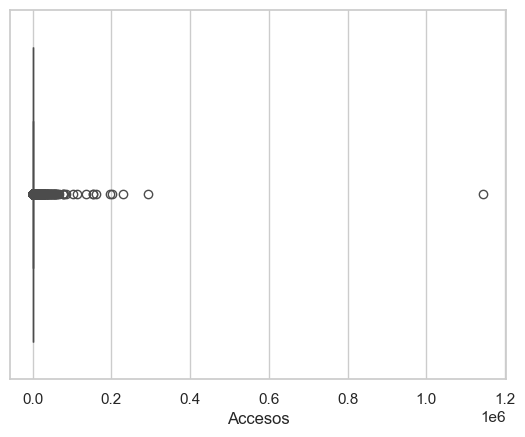

In [191]:
sns.boxplot(x=Accesos_tecnologia_localidad['Accesos'])

En la tabla de accesor por tecnologia y localidad observamos un outlier, sin embargo al verificar la informacion observamos que dicho dato proviene de la provincia de CABA la cual se considera una unica provincia sin estar separa por partidos por lo cual se considera normal que el dato se encuentre de esa manera.

<Axes: xlabel='Mbps (Media de bajada)'>

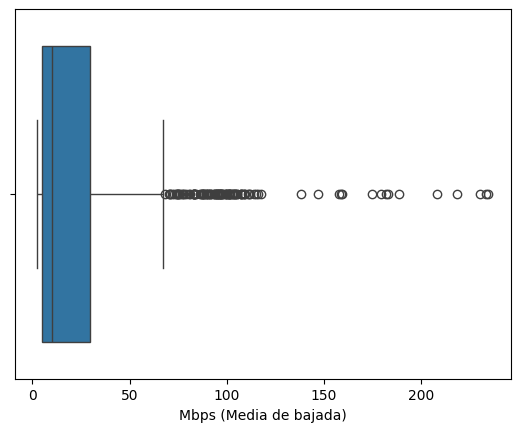

In [90]:
sns.boxplot(x=Velocidad_por_prov['Mbps (Media de bajada)'])

En caso de velocidad por provincia se han encontrado diversos datos, sin embargo al revisar la informacion se ha observado que esto se debe a un aumento de velocidad en los recientes años respecto a la velocidad promedio con la que se contaba inicialmente

<Axes: xlabel='Accesos por cada 100 hab'>

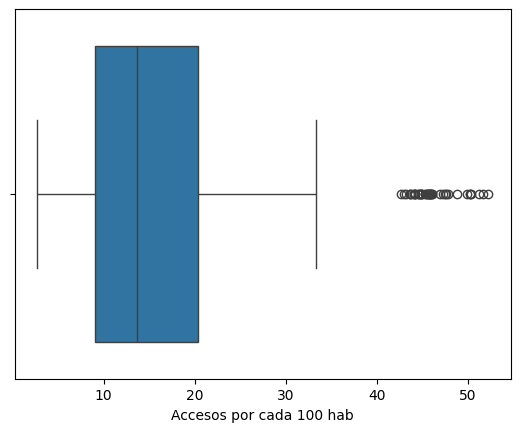

In [91]:
sns.boxplot(x=Penetración_poblacion['Accesos por cada 100 hab'])

<Axes: ylabel='Accesos por cada 100 hogares'>

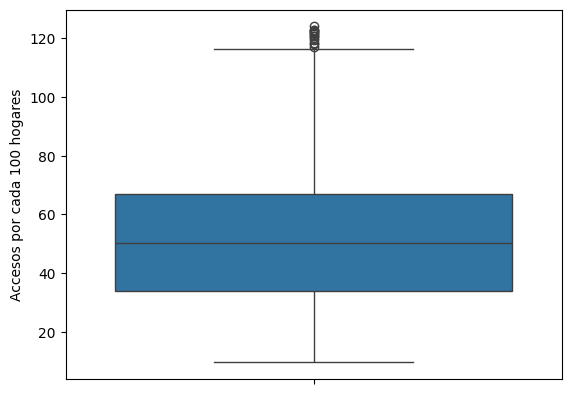

In [92]:
sns.boxplot(Penetracion_hogares['Accesos por cada 100 hogares'])

<Axes: ylabel='Ingresos (miles de pesos)'>

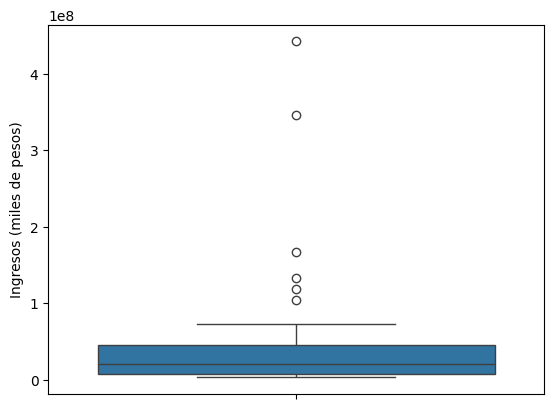

In [93]:
sns.boxplot(Ingresos['Ingresos (miles de pesos)'])

#### En la mayoria de columnas se nota un comportamiento similar a los iniciales, esto se debe al aumento de poblacion, cambio de tecnologia, mejoramiento de la infraestructura etc. esto indica que en los siguientes año seguira aumentando tanto la cantidad de ingresos como de accesos al servicio en la poblacion lo cual generara un grafico de mayor dimension, la cantidad de datos "nuevos" en consideracion con los mas "antiguos" es menor por lo cual se pueden considerar hasta cierto punto outliers, sin embargo, este tipo de cambio tiene una razon por lo cual no se considera algo fuera de lo comun.

### ----------------- Analisis categorico -------------------

#### A continuacion se realiza un analisis de las variables categoricas respecto a algunas numericas para observar el comportamiento de la informacion

#### Se seleccionan como prueba solo algunas tablas (las que se consideran mas importantes)

<Axes: xlabel='Tecnologia', ylabel='Accesos'>

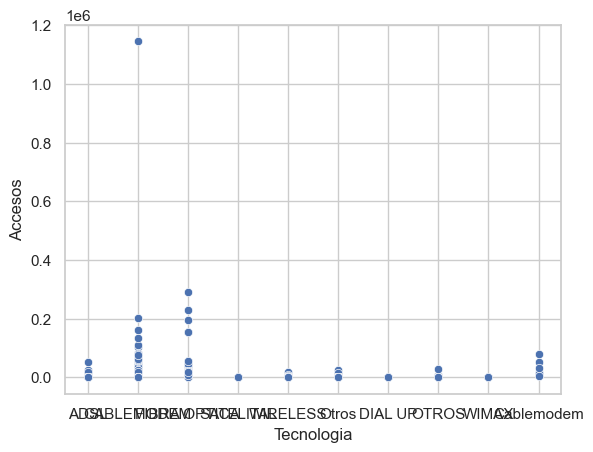

In [192]:
sns.scatterplot(x='Tecnologia', y='Accesos', data=Accesos_tecnologia_localidad)

<Axes: xlabel='Provincia', ylabel='Mbps (Media de bajada)'>

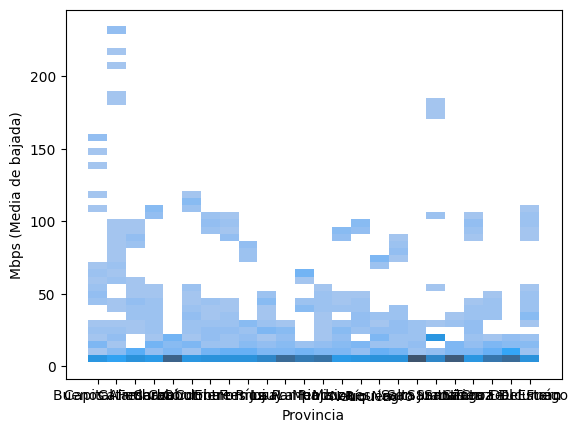

In [ ]:
sns.histplot(x='Provincia', y='Mbps (Media de bajada)', data=Velocidad_por_prov)

<Axes: xlabel='Año', ylabel='Ingresos (miles de pesos)'>

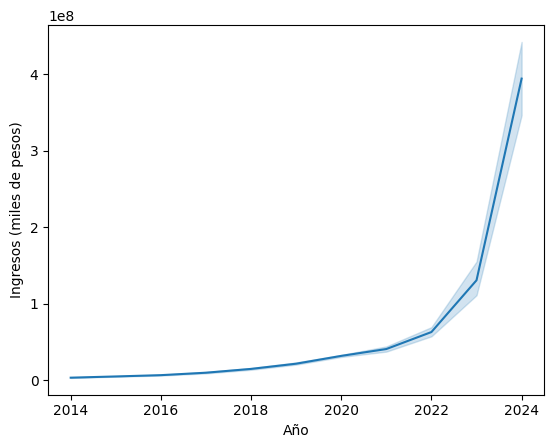

In [99]:
sns.lineplot(x='Año', y='Ingresos (miles de pesos)', data=Ingresos)

<Axes: xlabel='Año', ylabel='Total'>

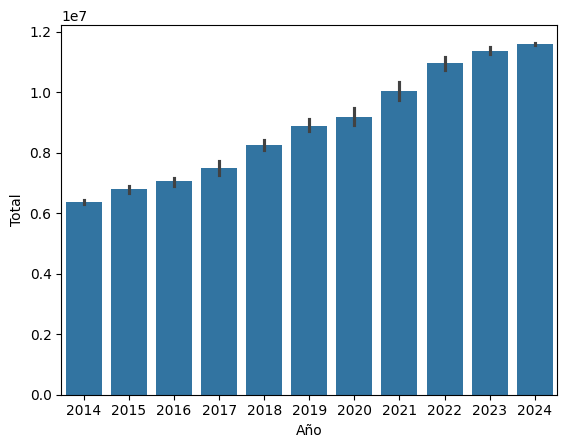

In [100]:
sns.barplot(x='Año',y='Total',data=Totales_Accesos_por_rango)

<Axes: xlabel='Año', ylabel='Accesos por cada 100 hab'>

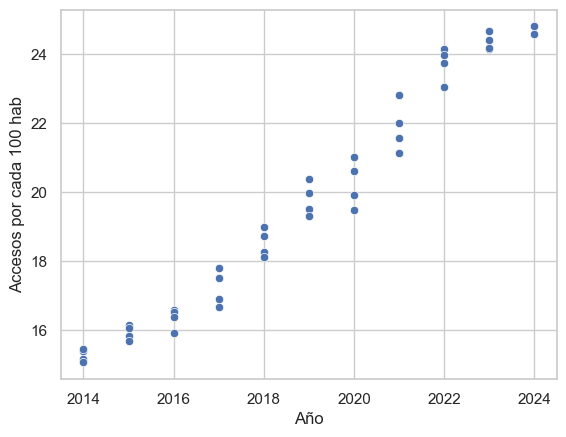

In [193]:
sns.scatterplot(x='Año',y='Accesos por cada 100 hab',data=Penetracion_totales)

<Axes: xlabel='Año', ylabel='Accesos por cada 100 hogares'>

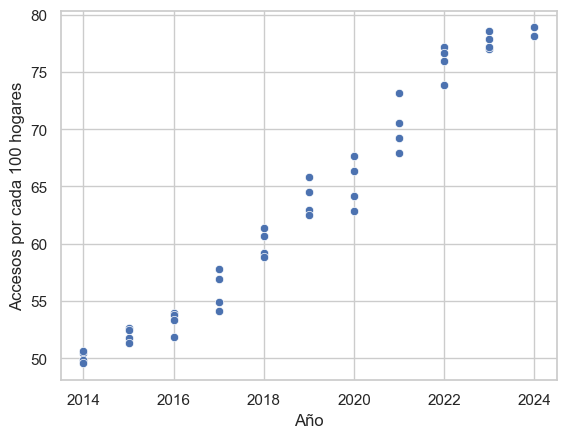

In [194]:
sns.scatterplot(x='Año',y='Accesos por cada 100 hogares',data=Penetracion_totales)

#### Al realizar el analisis por medio de un diagramas de dispersion, logramos ver la correlacion entre la informacion seleccionada, esto demuestra un aumento en los valores conforme pasan los años, esto a su vez tambien demuestra la relacion respecto a los datos "atipicos" previamente visualizados en los diagramas de caja, lo cual ahora se considera normal.

#### Los resultados demuestran que se cuenta con una correlacion positiva con lo cual es necesario realizar un tablero que permita ver los cambios de una forma mas facil de comprender